In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
data = pd.read_csv('datasets\Movies_Final.csv',parse_dates=['release_date'])

In [4]:
data.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,release_year,return,Director
0,Toy Story Collection,30000000,"Animation, Comedy, Family",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,...,English,Released,NaN,Toy Story,7.7,5415.0,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",1995,12.451801,John Lasseter
1,NaN,65000000,"Adventure, Fantasy, Family",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,1995-12-15,...,"English, Français",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",1995,4.043035,Joe Johnston
2,Grumpy Old Men Collection,0,"Romance, Comedy",15602,en,A family wedding reignites the ancient feud be...,11.712900,"Warner Bros., Lancaster Gate",United States of America,1995-12-22,...,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",1995,0.000000,Howard Deutch
3,NaN,16000000,"Comedy, Drama, Romance",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,...,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"Whitney Houston, Angela Bassett, Loretta Devin...",1995,5.090760,Forest Whitaker
4,Father of the Bride Collection,0,Comedy,11862,en,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",United States of America,1995-02-10,...,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"Steve Martin, Diane Keaton, Martin Short, Kimb...",1995,0.000000,Charles Shyer


## Top 10 Peliculas mas populares

In [5]:
data_sorted = data.sort_values(by='popularity', ascending=False)

In [6]:
top_10 = data_sorted.head(10)

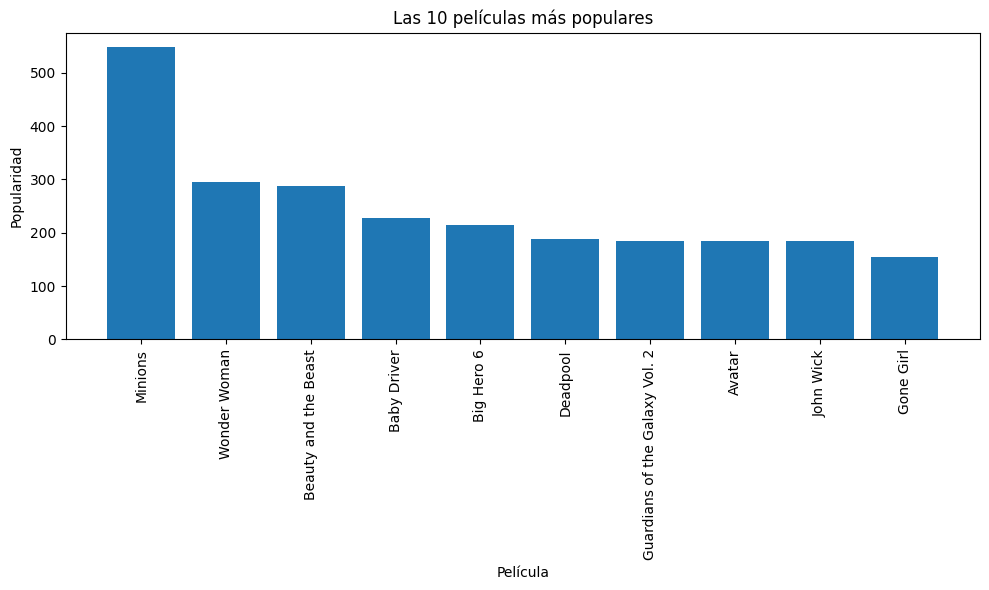

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(top_10['title'], top_10['popularity'])
plt.xlabel('Película')
plt.ylabel('Popularidad')
plt.title('Las 10 películas más populares')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Top 50 Generos mas consumidos

In [8]:
data_sorted = data.sort_values(by='popularity', ascending=False)

In [9]:
top_50 = data_sorted.head(50)

In [10]:
genre_popularity = top_50.groupby('genres')['popularity'].sum().sort_values(ascending=False)

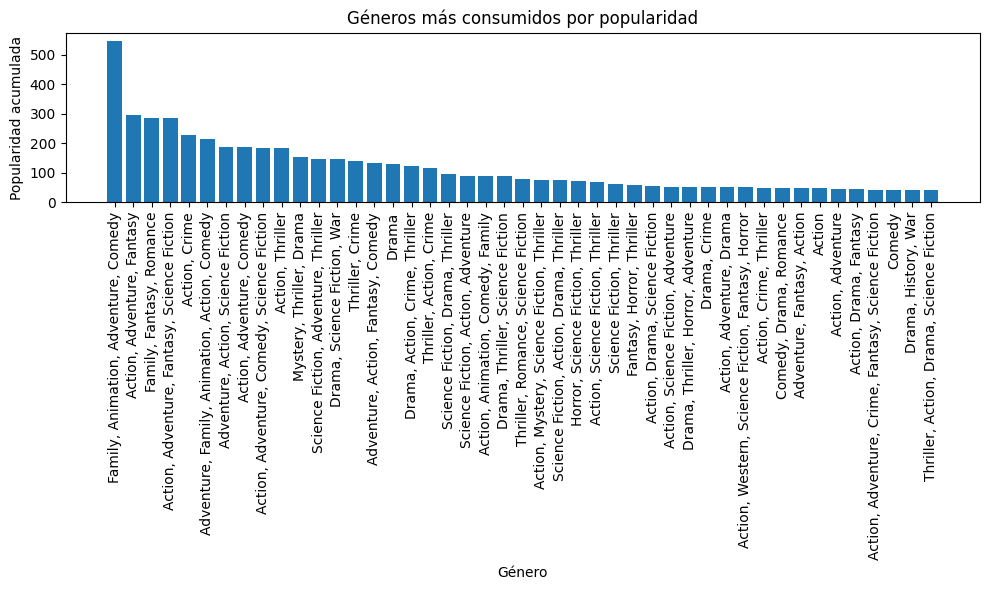

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(genre_popularity.index, genre_popularity.values)
plt.xlabel('Género')
plt.ylabel('Popularidad acumulada')
plt.title('Géneros más consumidos por popularidad')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Identificamoss valores faltantes

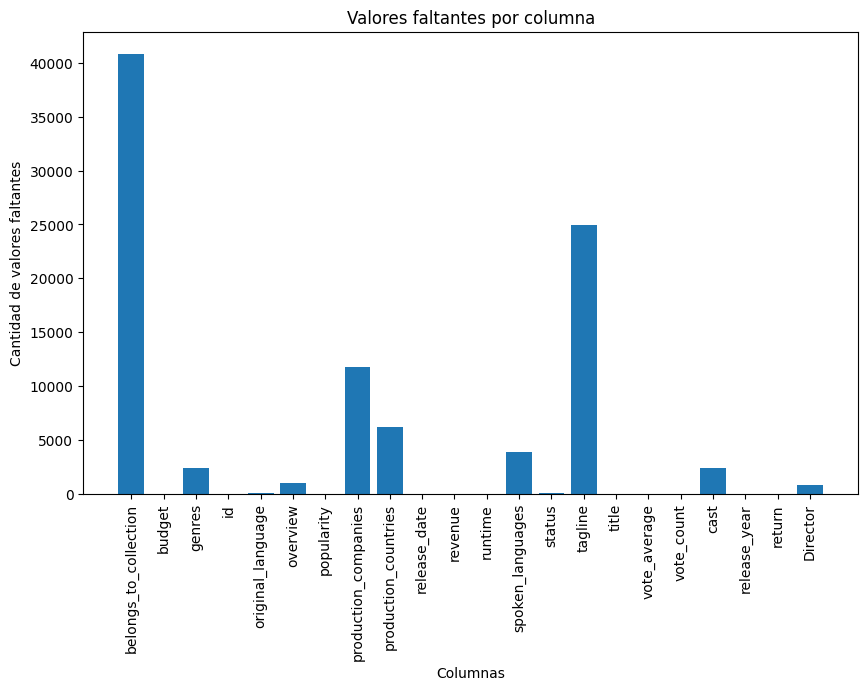

In [12]:
missing_values = data.isnull().sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores faltantes')
plt.title('Valores faltantes por columna')
plt.show()

# Terminos Mas Frecuentes

## Nube de Palabras

In [17]:
data_columns = ['genres', 'tagline', 'cast', 'Director']

In [18]:
for columns in data_columns:
    data[columns] = data[columns].fillna("")

In [19]:
df_combinada = data['genres']+ ' ' +data['tagline']+ ' ' +data['cast'] + ' ' +data['Director']

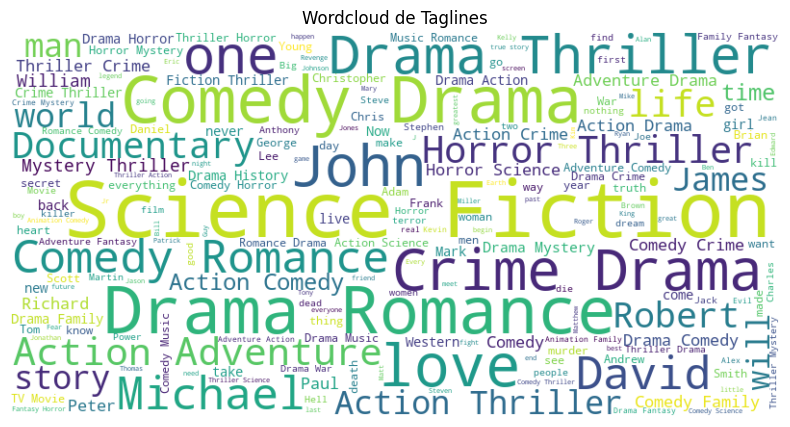

In [14]:
# Unir todas las frases de la columna 'tagline' en un solo texto
text = ' '.join(df_combinada.dropna())

# Crear el objeto Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar el Wordcloud utilizando Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud de Taglines')
plt.show()

## Count Vectorizer

In [36]:
count_vectorizer = CountVectorizer(stop_words='english', min_df=0.005)
corpus2 = count_vectorizer.fit_transform(df_combinada)
count_vectorizer.get_feature_names_out()

array(['aaron', 'action', 'adam', 'adventure', 'alan', 'albert',
       'aleksandr', 'alex', 'alexander', 'alice', 'allen', 'amy',
       'anderson', 'andrea', 'andrew', 'andré', 'andy', 'animation',
       'ann', 'anna', 'anne', 'anthony', 'antonio', 'arthur', 'baker',
       'barbara', 'barry', 'bell', 'ben', 'bennett', 'bernard', 'best',
       'billy', 'bob', 'brad', 'brian', 'brown', 'bruce', 'bruno',
       'cameron', 'campbell', 'carlos', 'catherine', 'chan', 'charles',
       'charlie', 'charlotte', 'chris', 'christian', 'christopher',
       'claire', 'clark', 'claude', 'colin', 'comedy', 'cooper', 'craig',
       'crime', 'curtis', 'dan', 'daniel', 'danny', 'david', 'davis',
       'day', 'dean', 'death', 'dennis', 'diane', 'dick', 'documentary',
       'don', 'donald', 'douglas', 'drama', 'ed', 'eddie', 'edward',
       'elizabeth', 'emily', 'eric', 'eva', 'evil', 'family', 'fantasy',
       'fernando', 'fiction', 'ford', 'foreign', 'francis', 'franco',
       'frank', 'fran

In [28]:
df = pd.DataFrame(corpus2.toarray(), columns=count_vectorizer.get_feature_names_out())

In [29]:
df

,aaron,action,adam,adventure,alan,albert,aleksandr,alex,alexander,alice,...,wayne,west,western,white,william,williams,wilson,woman,world,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45340,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45342,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45343,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


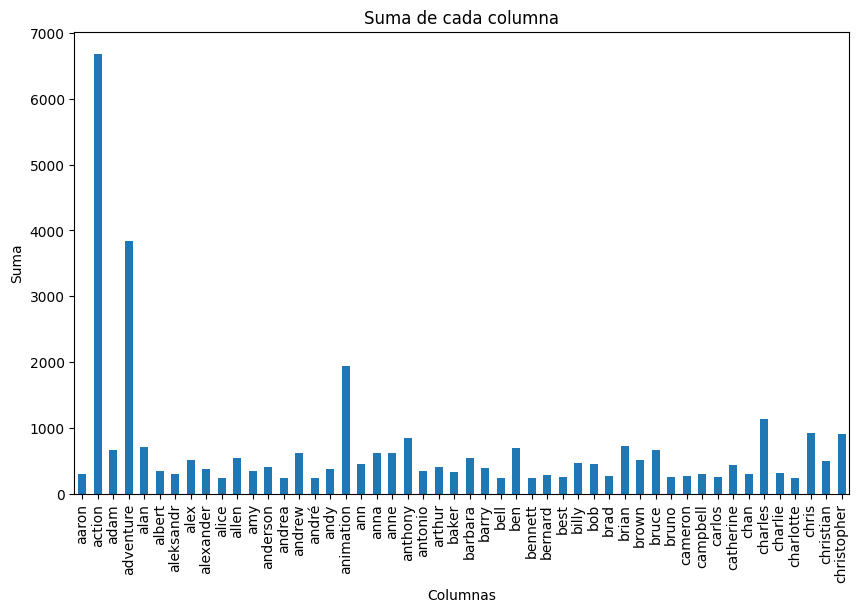

In [35]:
pd.set_option('display.max_rows', 134)
df_sum = df.sum(axis=0)

suma_columnas_reducido = df_sum[:50]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
suma_columnas_reducido.plot(kind='bar')
plt.xlabel('Columnas')
plt.ylabel('Suma')
plt.title('Suma de cada columna')
plt.xticks(rotation=90)
plt.show()